In [203]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [204]:
np.random.seed(1234)

n_features = 2
n_samples = 1000

# Vector of true weights
w_true = np.random.normal(size=n_features)

# Generation matrix X
X = np.random.uniform(-7, 7, (n_samples, n_features))

# Vector Y with random noise
Y = X.dot(w_true) + np.random.normal(0, 0.5, size=n_samples)

# Zero weights
w = np.zeros(n_features)

In [205]:
display(w, w_true, X, Y)

array([0., 0.])

array([ 0.47143516, -1.19097569])

array([[-0.87181165,  3.99502017],
       [ 3.91966131, -3.18370353],
       [-3.12950043,  4.22621049],
       ...,
       [ 3.51597757,  5.11940305],
       [ 6.35903104,  5.31390661],
       [ 5.12347492,  2.96879971]])

array([-5.71937308e+00,  6.42200487e+00, -6.22754907e+00, -3.61309248e+00,
       -1.24952278e+00, -2.10667534e+00, -1.87408546e+00,  8.06711862e+00,
       -4.75602542e+00, -2.03931948e+00, -5.77773483e-01,  8.32648436e-01,
       -5.55413438e+00, -1.84424278e+00,  3.29500371e+00,  8.02004094e+00,
       -1.64093596e+00, -8.35192303e+00, -6.93743921e+00,  2.59477266e+00,
       -5.89712012e+00,  1.15446630e-01, -4.28621134e+00, -1.65799764e+00,
       -4.20035318e+00,  8.65844888e+00, -5.58161780e+00, -5.24268607e+00,
       -1.93540562e+00, -4.29251150e+00,  6.18523295e+00,  6.04222590e+00,
       -8.96774218e+00,  3.69668619e+00,  3.48567877e-01,  6.04312911e+00,
       -7.57478182e+00, -1.19004926e+00,  8.83052162e-01, -2.55849924e+00,
        1.38656102e-01,  7.32546475e+00, -4.77011812e+00,  2.18687354e+00,
       -2.72725941e+00, -6.67982807e+00, -1.24453429e+00, -4.56700595e+00,
       -5.33599657e+00, -2.02454680e+00, -1.12923894e-01,  8.47399702e+00,
       -4.36753898e+00, -

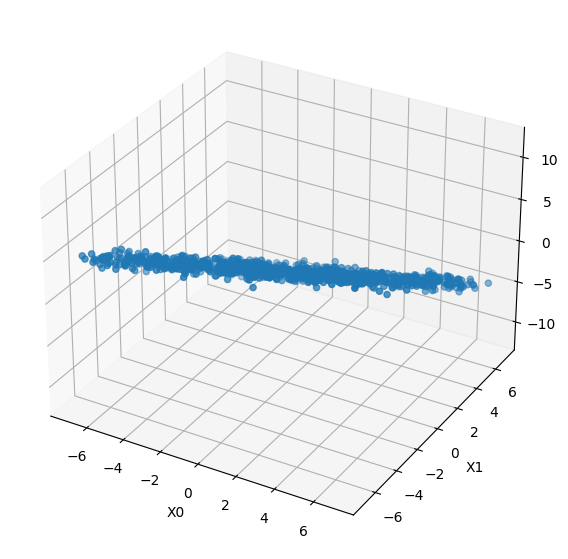

In [206]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y)
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
plt.show()

In [207]:
# MSE
def mse_error(y, x, weights):
    y_pred = x.dot(weights)
    return (np.sum((y_pred - y)**2)) / len(y)

In [208]:

# ANALYTICAL SOLUTION (with derivatives) (complex calculations!)


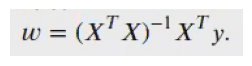

In [209]:
# vector of weights with normal equation of linear regression
img = mpimg.imread('images/vector_of_weights.jpg')
plt.figure(figsize=(3, 1))
plt.imshow(img)
plt.axis('off')
plt.show()

In [210]:
normal_eq_w = np.linalg.inv(np.dot(X.T, X)) @ X.T @ Y
print(f'weights: {normal_eq_w}')

weights: [ 0.46622325 -1.18317886]


In [211]:
print(f'If use normal_eq_w => error: ', end='')
print(f'{round(mse_error(Y, X, normal_eq_w), 4)}')

If use normal_eq_w => error: 0.2413


In [212]:
w_true

array([ 0.47143516, -1.19097569])

In [213]:

# GRADIENT DESCENT


In [214]:
w = np.zeros(n_features)

# list of vectors of weights after every iteration
w_list = [w.copy()]

# list of errors
e_list = []

# learning rate
eta = 0.01

# max iterations
max_iters = 1e4

# convergence criterion (result of difference of weights in which algorithm stop)
min_weight_dist = 1e-8

# start (big) difference of weights
weight_dist = np.inf

# count of iters
n_iters = 0

In [215]:
# Process of gradient descent
while weight_dist > min_weight_dist and n_iters < max_iters:
    y_pred = np.dot(X, w)

    # derivative of MSE
    print(X.T)
    dQ = 2 / Y.shape[0] * np.dot(X.T, y_pred - Y)
    new_w = w - eta * dQ
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    error = mse_error(Y, X, new_w)

    w_list.append(new_w.copy())
    e_list.append(error)

    print(f'Iter {n_iters}: error - {error}, weights - {new_w}')

    n_iters += 1
    w = new_w

w_list = np.array(w_list)  # convert to numpy
w_pred = w_list[-1]  # last value

print(f'If use gradient descent => error: {round(e_list[-1], 4)}')

[[-0.87181165  3.91966131 -3.12950043 ...  3.51597757  6.35903104
   5.12347492]
 [ 3.99502017 -3.18370353  4.22621049 ...  5.11940305  5.31390661
   2.96879971]]
Iter 0: error - 12.198224910563487, weights - [ 0.13477638 -0.38857461]
[[-0.87181165  3.91966131 -3.12950043 ...  3.51597757  6.35903104
   5.12347492]
 [ 3.99502017 -3.18370353  4.22621049 ...  5.11940305  5.31390661
   2.96879971]]
Iter 1: error - 5.721927562708119, weights - [ 0.23166602 -0.64911175]
[[-0.87181165  3.91966131 -3.12950043 ...  3.51597757  6.35903104
   5.12347492]
 [ 3.99502017 -3.18370353  4.22621049 ...  5.11940305  5.31390661
   2.96879971]]
Iter 2: error - 2.757139097172467, weights - [ 0.30088498 -0.82395109]
[[-0.87181165  3.91966131 -3.12950043 ...  3.51597757  6.35903104
   5.12347492]
 [ 3.99502017 -3.18370353  4.22621049 ...  5.11940305  5.31390661
   2.96879971]]
Iter 3: error - 1.3976931456804218, weights - [ 0.350075   -0.94137792]
[[-0.87181165  3.91966131 -3.12950043 ...  3.51597757  6.35903

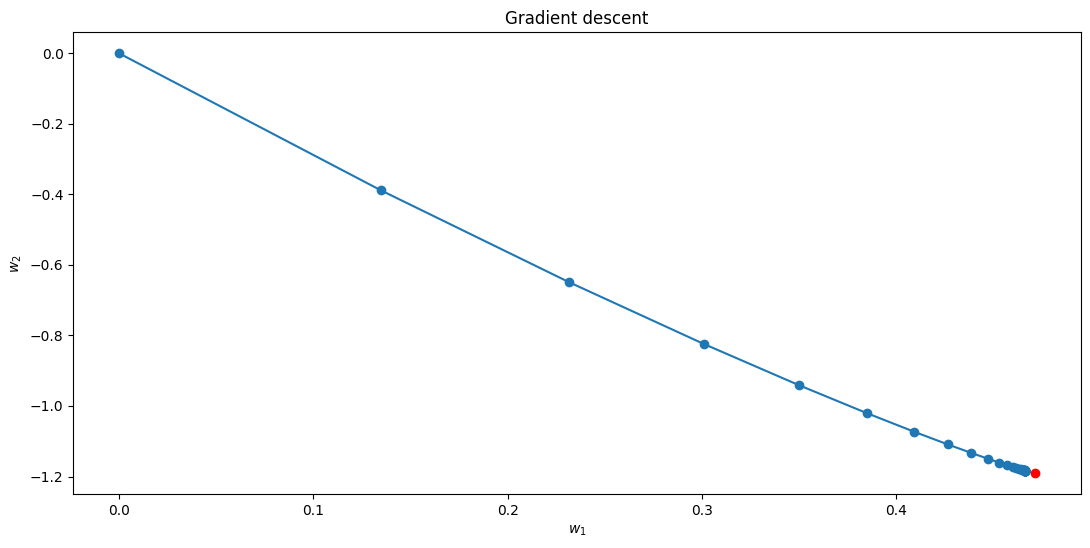

In [216]:
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

# weights in iters
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0], w_true[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])
plt.show()

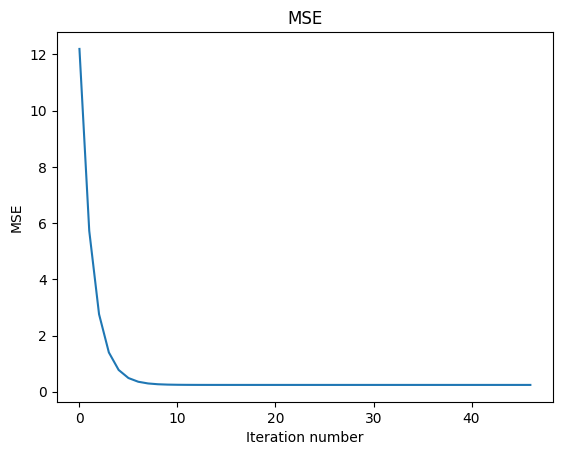

In [217]:
# Visualization error
plt.figure()
plt.plot(range(len(e_list)), e_list)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.show()

In [218]:
def mse_manual(w1, w2, y_pred):
    w = np.array([w1, w2])
    y = X.dot(w)
    return (sum((y_pred - y)**2)) / len(y)

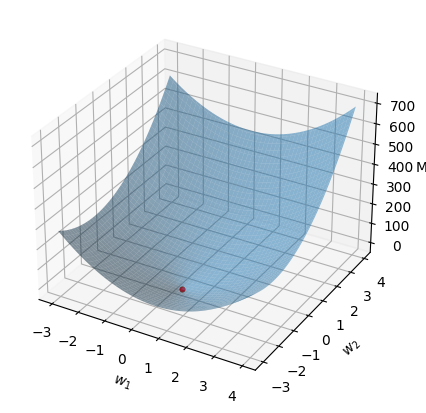

In [219]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
w1 = w2 = np.arange(-3.0, 4.0, 0.05)
w1, w2 = np.meshgrid(w1, w2)

zs = np.array([mse_manual(i, j, Y) for i, j in zip(np.ravel(w1), np.ravel(w2)) ])
Z = zs.reshape(w1.shape)

ax.scatter(w_true[0], w_true[1], mse_manual(w_true[0], w_true[1], Y), c='r', s=10)
ax.scatter(w_pred[0], w_pred[1], mse_manual(w_pred[0], w_pred[1], Y), c='g', s=10)
ax.plot_surface(w1, w2, Z, alpha=.5)

ax.set_xlabel(r'$w_1$')
ax.set_ylabel(r'$w_2$')
ax.set_zlabel('MSE')

plt.show()